# Исследование тарифов сотовой связи "Мегалайн"<a name="introduction"></a>

**КРАТКОЕ ОПИСАНИЕ ИССЛЕДОВАНИЯ** 

**Цель исследования** 

Научиться определять, какой тариф является более прибыльным, и проанализировать поведение клиентов разных тарифов. 

**Входные данные** 

Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Заказчик исследования**

Коммерческий департамент сотовой связи "Мегалайн". 

**Практическое применение результатов исследования**

Исследование позволит коммерческому департаменту "Мегалайн" скорректировать рекламный бюджет

# <a name="contents"> </a> Содержание исследования

## [Обзор данных и предобработка](#stage_1)
   
* Обзор таблицы  users
* Обзор таблицы calls 
* Обзор таблицы internet
* Обзор таблицы messages

## [Обогащение данных и создание сводных таблиц](#stage_2)

* Добавление колонки с месяцемв 
* Добавление колонки с включенным в тариф интернет-трафиком, выраженного в гигабайтах
* Создание сводной таблицы для каждого пользователя помесячно по звонкам
* Создание сводной таблицы по количеству сообщений для каждого пользователя помесячно
* Создание сводной таблицы по объему израсходованного интернет-трафика по месяцам для каждого пользователя
* Объединение таблиц: объединение звонков и сообщений, добавление таблицы с интернет-трафиком, добавление таблицы с информацией о пользователях и о тарифе.
* Проверка результирующей таблицы.

## [Анализ данных финальной сводной таблицы](#stage_3)

* Визуализация данных (построение гистограмм, ящиков с усами)
* Ответы на вопросы

## [Проверка гипотез](#stage_4)

* Проверка гипотезы о равенстве средних выручек тарифов ultra и smart
* Проверка гипотезы о равенстве средних выручек для Москвы и других городов

## [Общий вывод](#stage_5)

<a name="stage_1"></a>

# Этап 1. Обзор данных


[Наверх к оглавлению](#contents)

Импортируем библиотеки для проекта

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Загрузим файлы

In [2]:
users = pd.read_csv('data/users.csv') 
calls = pd.read_csv('data/calls.csv')
internet = pd.read_csv('data/internet.csv', index_col=0) 
messages = pd.read_csv('data/messages.csv') 
tariffs = pd.read_csv('data/tariffs.csv') 

Бегло посмотрим, как загрузились наши данные

In [3]:
df_list = [users, calls, internet, messages, tariffs]

for df in df_list:
    print()
    display(df.head())
    print()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все ок, двигаемся дальше. 

## Таблица users

Информация о пользователях 

**Описание данных согласно документации:**
    
    user_id — уникальный идентификатор пользователя

    first_name — имя пользователя

    last_name — фамилия пользователя

    age — возраст пользователя (годы)

    reg_date — дата подключения тарифа (день, месяц, год)

    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    
    city — город проживания пользователя

    tarif — название тарифного плана

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В столбце churn_date пропущены значения. Согласно документации если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Здесь ничего не трогаем.

Можно было бы привести reg_date к типу данных datetime, но не будем тратить на это время, поскольку этот столбец не интересен нам для исследования. 
С остальными типами данных все в порядке.

Удобно, когда user_id не численный тип, чтобы ничего там не считать, поэтому приведем user_id к строке.

In [5]:
users = users.astype({'user_id': 'str'}) 

In [6]:
f'Количество явных дубликатов: {users.duplicated().sum()}'

'Количество явных дубликатов: 0'

Выводим описательную статистику. Поскольку у нас только age имеет численный тип, то только по нему и получим статистику

In [7]:
users.describe()

,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


Проверяем, точно ли у нас два тарифа в датасете

In [8]:
users.tariff.unique()

array(['ultra', 'smart'], dtype=object)

Cмотрим на процент пользователей в зависимости от тарифа

In [9]:
f"Процент пользователей тарифа ультра: {users[users['tariff']=='ultra'].count()[0]/len(users):.1%}"

'Процент пользователей тарифа ультра: 29.8%'

In [10]:
f"Процент пользователей тарифа смарт: {users[users['tariff']=='smart'].count()[0]/len(users):.1%}"

'Процент пользователей тарифа смарт: 70.2%'

Посмотрим на столбец city. Выведем на экран список уникальных названий городов, отсортированный в алфавитном порядке. 

In [11]:
users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

В названии городов нарушений не обнаружено.

Посмотрим на распределение пользователей по городам. Выведем процент пользователей по каждому городу от общего количества клиентов.

In [12]:
users['city'].value_counts(normalize=True).to_frame().rename(columns={'city': 'percent_of_users'}).style.format('{:.1%}')

,percent_of_users
Москва,19.8%
Санкт-Петербург,7.8%
Новосибирск,3.2%
Омск,2.8%
Казань,2.8%
Уфа,2.4%
Краснодар,2.2%
Набережные Челны,2.2%
Ульяновск,2.2%
Екатеринбург,2.2%


Больше всего пользователей - из Москвы. Они составляют 19.8% от всех пользователей.

### Вывод

* В нашей выборке 500 пользователей. 

* Все они пользуются либо тарифом smart, либо тарифом ultra.

* Самый молодой пользователь имеет возраст 18 лет. Самый старый - 75. Средний возраст пользователя сотовой связи - 46 лет. 
    
* 70.2 % пользователей предпочитают тариф ультра. 29.8  % использут тариф смарт.
    
* Больше всего пользователей (19.8% от всей выборки) - жители Москвы.
    
* Явных дубликатов нет.
    
* Пропущены значения в столбце churn_date - для данного исследования не критично.




## Таблица calls

Информация о звонках.

**Описание данных согласно документации:**

* id — уникальный номер звонка

* call_date — дата звонка

* duration — длительность звонка в минутах

* user_id — идентификатор пользователя, сделавшего звонок


In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Хорошая новость: пропусков нет. 

In [14]:
f"Количество явных дубликатов: {calls.duplicated().sum()}"

'Количество явных дубликатов: 0'

Сначала глянем на значения в столбце с датой, чтобы увидеть формат, а потом приведем данные к типу datetime.

In [15]:
calls['call_date'].sample(1)

173507    2018-09-30
Name: call_date, dtype: object

Меняем тип данных на datetime - запишем в отдельную колонку измененный тип.

In [16]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [17]:
calls['call_date']

0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

User_id, id также приводим к строке, чтобы ничего там не считать.

In [18]:
calls = calls.astype({'user_id': 'str', 'id': 'str'}) 

Проверяем тип данных

In [19]:
calls.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id              object
dtype: object

Все хорошо. Теперь смотрим на статистику длительности звонков.

In [20]:
calls.describe()

,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000


В среднем длительность звонок составляет около 7 минут.

Посмотрим гистограмму звонков по длительности.

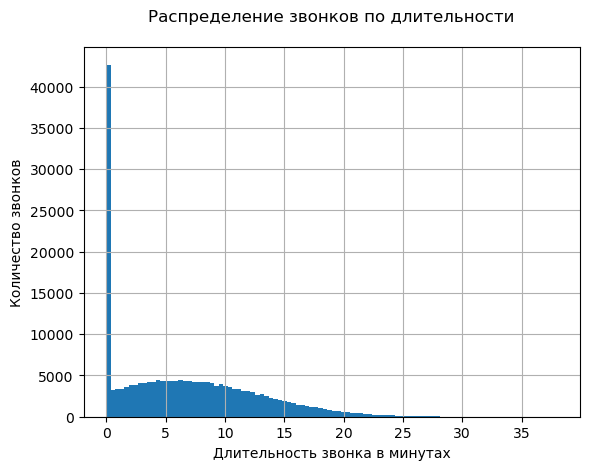

In [21]:
calls.hist('duration', bins=100)
plt.grid(True)
plt.title('Распределение звонков по длительности\n')
plt.xlabel('Длительность звонка в минутах')
plt.ylabel('Количество звонков')
plt.show();

Процент звонков длительностью 0 минут.

In [22]:
f"Процент звонков длительностью 0 минут: {len(calls.query('duration == 0'))/len(calls):.1%}"  

'Процент звонков длительностью 0 минут: 19.6%'

Согласно документации нулями обозначены пропущенные звонки. То есть в данных 19.6 процентов пропущенных звонков.

Посмотрим на количество звонков длительностью меньше минуты.

In [23]:
print('Количество звонков длительностью меньше 1 минуты:', len(calls.query('1 > duration > 0')),
      '\nПроцент от общей выборки: {:.1%}'.format(len(calls.query('1 > duration > 0'))/len(calls)))

Количество звонков длительностью меньше 1 минуты: 8314 
Процент от общей выборки: 4.1%


Посмотрим на количество уникальных пользователей:

In [24]:
f"Количество уникальных пользователей: {len(calls['user_id'].unique())}"

'Количество уникальных пользователей: 492'

Помним, что в таблице users у нас числится 500 уникальных пользователей.

Проверяем, точно ли у нас все данные за 2018 год.

In [25]:
print('Левая граница временного интервала: ', calls.call_date.min())
print('Правая граница временного интервала: ', calls.call_date.max())

Левая граница временного интервала:  2018-01-01 00:00:00
Правая граница временного интервала:  2018-12-31 00:00:00


Тут все в порядке.

### Вывод

* Явных дубликатов нет

* Пропусков в данных нет

* Количество пользователей в данной таблице 492, то есть меньше, чем в users на 8 человек. 

* В среднем звонок длится 7 минут

* Самый короткий звонок 0 минут, самый длинный - 38 минут.

* 19.6 процентов пропущенных звонков, то есть звонков длительностью 0 минут.

* Звонков длительностью меньше минуты крайне мало - 8314, или 4 процента от выборки. 


## Таблица internet

Информация об интернет-сессиях

**Описание данных согласно документации:**

* id — уникальный номер сессии

* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

* session_date — дата интернет-сессии

* user_id — идентификатор пользователя

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB



Пропусков в данных нет

In [27]:
f"Количество явных дубликатов: {internet.duplicated().sum()}"

'Количество явных дубликатов: 0'

user_id, id также приводим к строке, чтобы ничего там не считать

In [28]:
internet = internet.astype({'user_id': 'str', 'id': 'str'}) 

Посмотрим, какой формат у нам у даты интернет-сессии

In [29]:
internet['session_date'].sample(1)

21133    2018-02-05
Name: session_date, dtype: object

Меняем тип данных на datetime:

In [30]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

Проверяем тип данных

In [31]:
internet.dtypes

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                 object
dtype: object

Все хорошо.

Посмотрим на количество уникальных пользователей в таблице internet.

In [32]:
f"Количество уникальных пользователей: {len(internet['user_id'].unique())}"

'Количество уникальных пользователей: 497'

Проверяем, точно ли у нас все данные за 2018 год

In [33]:
print('Левая граница временного интервала: ', internet.session_date.min())
print('Правая граница временного интервала: ', internet.session_date.max())

Левая граница временного интервала:  2018-01-01 00:00:00
Правая граница временного интервала:  2018-12-31 00:00:00


Посмотрим на описательную статистику количества использованных мегабайтов, столбец `mb_used`.

In [34]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [35]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


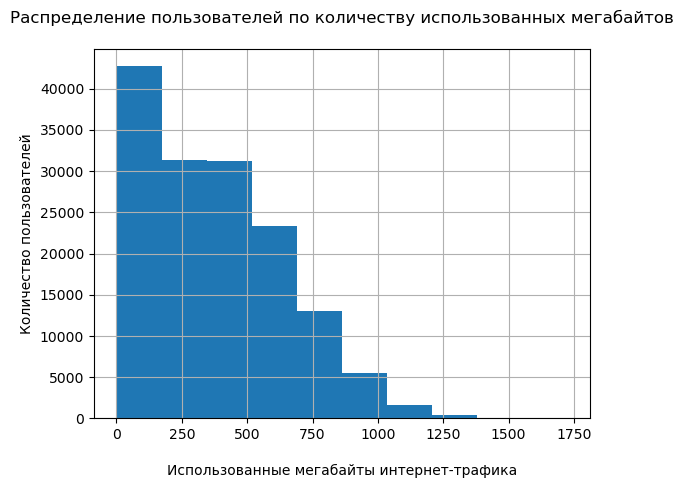

In [36]:
internet['mb_used'].hist()
plt.title('Распределение пользователей по количеству использованных мегабайтов\n')
plt.xlabel('\nИспользованные мегабайты интернет-трафика')
plt.ylabel('Количество пользователей')
plt.show();

На графике видим большое количество нулей. Посмотрим на процент пользователей, которые использовали 0 мегабайтов.

In [37]:
f"Процент пользователей, которые использовали 0 мегабайтов интернет-трафика: {len(internet.query('mb_used == 0'))/len(internet):.1%}"  

'Процент пользователей, которые использовали 0 мегабайтов интернет-трафика: 13.1%'

### Вывод

* Пропусков в данных нет.

* Явных дубликатов не обнаружено.

* Количество уникальных пользователей - 497, что на 3 человека меньше, чем в датасете users.

* У 13% от всей выборки зафиксировано нулевое значение использованных мегабайтов интернет-траффика. 

    Возможно, либо это была слишком короткая интернет-сессия (которая по каким-то причинам не фиксировалась), 
либо были какие-то сбои в системе регистрации сессии, либо пользователь действительно не пользовался интернет-трафиком. 

* В среднем за 2018 год пользователь использует 348 мб интернет-траффика. 

## Таблица messages

Информация о сообщениях

**Описание данных согласно документации:**

* id — уникальный номер сообщения

* message_date — дата сообщения

* user_id — идентификатор пользователя, отправившего сообщение

In [38]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков в данных нет

In [39]:
f"Количество явных дубликатов: {messages.duplicated().sum()}"

'Количество явных дубликатов: 0'

user_id, id приводим к строке, чтобы ничего там не считать

In [40]:
messages = messages.astype({'user_id': 'str', 'id': 'str'}) 

Смотрим, какой формат у нам у даты интернет-сессии

In [41]:
messages['message_date'].sample(1)

61539    2018-10-18
Name: message_date, dtype: object

Меняем тип данных на datetime:

In [42]:
messages.message_date = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

Проверяем тип данных

In [43]:
messages.dtypes

id                      object
message_date    datetime64[ns]
user_id                 object
dtype: object

Все в порядке

Посмотрим на количество уникальных пользователей в таблице messages

In [44]:
f"Количество уникальных пользователей: {len(messages['user_id'].unique())}"

'Количество уникальных пользователей: 426'

Снова количество уникальных пользователей меньше, чем в общей базе данных о пользователях.

Проверяем, точно ли у нас все данные за 2018 год в датасете messages

In [45]:
print('Левая граница временного интервала: ', messages.message_date.min())
print('Правая граница временного интервала: ', messages.message_date.max())

Левая граница временного интервала:  2018-01-02 00:00:00
Правая граница временного интервала:  2018-12-31 00:00:00


Все в порядке. 

In [46]:
#Посмотрим, сколько всего сообщений было сгенерировано за 2018 год:

In [47]:
f"Всего за 2018 год сгенерировано {messages['message_date'].count()} сообщений."

'Всего за 2018 год сгенерировано 123036 сообщений.'

### Вывод

* Пропусков в данных нет.

* Явных дубликатов не обнаружено.

* Количество уникальных пользователей - 426, что на 74 человека меньше, чем в датасете users.

* Всего за 2018 год сгенерировано 123036 сообщений.  

## Таблица tariffs

Информация о тарифах.

**Описание данных согласно документации:**

* tariff_name — название тарифа

* rub_monthly_fee — ежемесячная абонентская плата в рублях

* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

* messages_included — количество сообщений в месяц, включённых в абонентскую плату

* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

* rub_per_message — стоимость отправки сообщения сверх тарифного пакета

* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов согласно документации**

Тариф «Смарт»
    
    Ежемесячная плата: 550 рублей

    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

    Стоимость услуг сверх тарифного пакета:

        минута разговора: 3 рубля

        сообщение: 3 рубля

        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    
    Стоимость услуг сверх тарифного пакета:

        минута разговора: 1 рубль

        сообщение: 1 рубль

        1 Гб интернет-трафика: 150 рублей

In [48]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание тарифа согласно документации немного расходится в разделе включенного в стоимость тарифа интернет-трафика. 

Данные же показывают, что в тариф включено чуть больше трафика: 15 гб 360 мб для тарифа smart, 30 гб 720 мб - для тарифа ultra.

Далее в документации говорится о том, что трафик округляется в большую сторону и отдельные сессии не считаются, по этой причине нет смысла учитывать эти лишние мегабайты - следуем документации.

In [49]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

Описание тарифа согласно документации немного расходится в разделе включенного в стоимость тарифа интернет-трафика. 

Данные показывают, что в тариф включено чуть больше трафика: 15 гб 360 мб для тарифа smart, 30 гб 720 мб - для тарифа ultra.

Пропуски есть только в датафрейме users в столбце churn_date, но эти данные нам не потребуются при исследовании и мы можем оставить пропуски как есть.

Мы поменяли для всех дат тип данных на datetime для удобства работы с датами, а также мы изменили тип данных у user_id на строковый, чтобы ничего здесь не считалось.

<a name="stage_2"></a>

# Этап 2. Обогащение данных и создание сводных таблиц


[Наверх к оглавлению](#contents)

### Добавление колонки с месяцем

Добавим в наши таблицы услуг столбец с месяцем, чтобы потом по нему сгруппировать данные.

In [50]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
messages['month'] = messages['message_date'].values.astype('datetime64[M]')

Посмотрим, что у нас получилось 

In [51]:
df_list = [calls, internet, messages]
for df in df_list:
    print()
    display(df.head())
    print()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,2018-07-01
1,1000_1,2018-08-17,0.00,1000,2018-08-01
2,1000_2,2018-06-11,2.85,1000,2018-06-01
3,1000_3,2018-09-21,13.80,1000,2018-09-01
4,1000_4,2018-12-15,5.18,1000,2018-12-01


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,1000_4,302.56,2018-09-24,1000,2018-09-01


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


<a id='gb'></a>

### Добавление колонки с включенным в тариф интернет-трафиком, выраженного в гигабайтах

In [52]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Согласно документации в тариф smart включено 15 гб, а в тариф ultra - 30. 
Для удобства расчета добавим столбец gb_per_month_included в исходный фрейм данных

In [53]:
tariffs.insert(2, "gb_per_month_included", [15, 30], True)
tariffs

,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,15,500,550,200,3,3,smart
1,1000,30720,30,3000,1950,150,1,1,ultra


### Создание сводных таблиц

#### Cводная таблица для каждого пользователя помесячно по звонкам

Cоздадим сводную таблицу: для каждого пользователя помесячно посчитаем общую длительность звонков и количество звонков

In [54]:
pivot_calls = calls.groupby(['month','user_id'])['duration'].agg(['sum', 'count']).reset_index()
pivot_calls

,month,user_id,sum,count
0,2018-01-01,1005,90.93,15
1,2018-01-01,1032,359.16,61
2,2018-01-01,1045,8.33,1
3,2018-01-01,1055,527.95,64
4,2018-01-01,1071,183.96,24
...,...,...,...,...
3169,2018-12-01,1494,388.29,62
3170,2018-12-01,1495,970.94,155
3171,2018-12-01,1496,483.91,80
3172,2018-12-01,1497,515.33,71


Переименуем столбцы sum и count

In [55]:
pivot_calls.rename(columns={"sum": "calls_duration", "count": "calls_count"}, inplace=True)
pivot_calls

,month,user_id,calls_duration,calls_count
0,2018-01-01,1005,90.93,15
1,2018-01-01,1032,359.16,61
2,2018-01-01,1045,8.33,1
3,2018-01-01,1055,527.95,64
4,2018-01-01,1071,183.96,24
...,...,...,...,...
3169,2018-12-01,1494,388.29,62
3170,2018-12-01,1495,970.94,155
3171,2018-12-01,1496,483.91,80
3172,2018-12-01,1497,515.33,71


**Из документации:**
    
«Мегалайн» всегда округляет секунды до минут... Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

<a id='ceiling_calls'></a> 

Округлим длительность звонков в большую сторону согласно правилу из документации

In [56]:
pivot_calls['calls_duration']

0        90.93
1       359.16
2         8.33
3       527.95
4       183.96
         ...  
3169    388.29
3170    970.94
3171    483.91
3172    515.33
3173    465.16
Name: calls_duration, Length: 3174, dtype: float64

Округлим длительность звонков и поменяет тип на int, раз у нас тут точно целые числа, без секунд.

In [57]:
pivot_calls['calls_duration'] = np.ceil(pivot_calls['calls_duration']).astype({'calls_duration': 'int64'}) 
pivot_calls['calls_duration']

0        91
1       360
2         9
3       528
4       184
       ... 
3169    389
3170    971
3171    484
3172    516
3173    466
Name: calls_duration, Length: 3174, dtype: int64

Мы успешно в ячейке выше округлили в большую сторону длительность звонков согласно требованию в документации.

<a id='debug'> </a> 

Небольшой дебаггинг

Проверим нашу сводную таблицу для разных пользователей

Для случайного пользователя c айдишником 1497

In [58]:
pivot_calls[pivot_calls['user_id'] == '1497']

,month,user_id,calls_duration,calls_count
2257,2018-10-01,1497,464,66
2702,2018-11-01,1497,347,64
3172,2018-12-01,1497,516,71


Сложим длительность всех звонков у этого пользователя 1497 из исходной таблицы

In [59]:
calls[calls['user_id'] == '1497']['duration'].sum()

1324.68

Проверим длительность всех звонков у пользователя 1497 в сводной таблице

In [60]:
pivot_calls[pivot_calls['user_id'] == '1497']['calls_duration'].sum()

1327

Все ок с учетом того, что в сводной у нас уже округлнные вверх значения. Запомним, что пользователь 1497 совершал звонки только в октябре-ноябре-декабре. Потом тоже проверим этот факт в финальной сводной таблице.

И еще возьмем случайного пользователя 1032

In [61]:
pivot_calls[pivot_calls['user_id'] == '1032']

,month,user_id,calls_duration,calls_count
1,2018-01-01,1032,360,61
45,2018-02-01,1032,349,58
131,2018-03-01,1032,460,68
250,2018-04-01,1032,489,76
421,2018-05-01,1032,481,78
627,2018-06-01,1032,383,54
871,2018-07-01,1032,395,59
1162,2018-08-01,1032,420,58
1500,2018-09-01,1032,481,68
1875,2018-10-01,1032,365,60


In [62]:
len(pivot_calls[pivot_calls['user_id'] == '1032'])

12

Пользователь 1032 совершал звонки каждый месяц

#### Cводная таблица по количеству сообщений для каждого пользователя помесячно

In [63]:
pivot_messages = messages.groupby(['month','user_id'])['message_date'].count().reset_index()
pivot_messages

,month,user_id,message_date
0,2018-01-01,1005,7
1,2018-01-01,1032,38
2,2018-01-01,1045,5
3,2018-01-01,1055,30
4,2018-01-01,1071,16
...,...,...,...
2712,2018-12-01,1493,78
2713,2018-12-01,1495,84
2714,2018-12-01,1496,51
2715,2018-12-01,1497,17


Переименуем столбец count 

In [64]:
pivot_messages.rename(columns={"message_date": "msg_count"}, inplace=True)
pivot_messages

,month,user_id,msg_count
0,2018-01-01,1005,7
1,2018-01-01,1032,38
2,2018-01-01,1045,5
3,2018-01-01,1055,30
4,2018-01-01,1071,16
...,...,...,...
2712,2018-12-01,1493,78
2713,2018-12-01,1495,84
2714,2018-12-01,1496,51
2715,2018-12-01,1497,17


Проверим, как отработал groupby по случайному пользователю

In [65]:
pivot_messages[pivot_messages['user_id'] == '1005']

,month,user_id,msg_count
0,2018-01-01,1005,7
38,2018-02-01,1005,38
104,2018-03-01,1005,56
198,2018-04-01,1005,41
335,2018-05-01,1005,42
510,2018-06-01,1005,47
719,2018-07-01,1005,56
967,2018-08-01,1005,64
1259,2018-09-01,1005,52
1577,2018-10-01,1005,44


Количество отправленных сообщений за 1 января пользователем 1005 сходится со значением в сводной таблице

In [66]:
messages.query('month == "2018-01-01" and user_id == "1005"')

,id,message_date,user_id,month
2242,1005_104,2018-01-25,1005,2018-01-01
2255,1005_117,2018-01-26,1005,2018-01-01
2268,1005_130,2018-01-28,1005,2018-01-01
2406,1005_268,2018-01-28,1005,2018-01-01
2565,1005_427,2018-01-28,1005,2018-01-01
2641,1005_503,2018-01-29,1005,2018-01-01
2676,1005_538,2018-01-27,1005,2018-01-01


#### Cводная таблица по объему израсходованного интернет-трафика по месяцам для каждого пользователя


In [67]:
pivot_internet = internet.groupby(['month','user_id'])['mb_used'].sum().reset_index()
pivot_internet

,month,user_id,mb_used
0,2018-01-01,1005,2727.97
1,2018-01-01,1032,24127.69
2,2018-01-01,1045,2346.71
3,2018-01-01,1055,17090.88
4,2018-01-01,1071,15604.34
...,...,...,...
3198,2018-12-01,1494,17621.21
3199,2018-12-01,1495,23426.76
3200,2018-12-01,1496,20736.15
3201,2018-12-01,1497,19918.60


<a id='ceiling_gb'></a> 

Согласно документации «Мегалайн» всегда округляет мегабайты — до гигабайт. 
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Следуя этому требованию создадим отдельно столбец с гигабайтами, округлим в большую сторону.

In [68]:
pivot_internet['gb_used'] = pivot_internet['mb_used'] / 1024
pivot_internet.head()

,month,user_id,mb_used,gb_used
0,2018-01-01,1005,2727.97,2.664033
1,2018-01-01,1032,24127.69,23.562197
2,2018-01-01,1045,2346.71,2.291709
3,2018-01-01,1055,17090.88,16.690313
4,2018-01-01,1071,15604.34,15.238613


Округлим количество использованных мегабайтов в большую сторону и поменяем тип на int, раз у нас тут точно целые числа, без мегабайт

In [69]:
pivot_internet['gb_used'] = np.ceil(pivot_internet['gb_used']).astype({'gb_used': 'int64'}) 
pivot_internet.head()

,month,user_id,mb_used,gb_used
0,2018-01-01,1005,2727.97,3
1,2018-01-01,1032,24127.69,24
2,2018-01-01,1045,2346.71,3
3,2018-01-01,1055,17090.88,17
4,2018-01-01,1071,15604.34,16


Мы успешно добавили столбец с гигабайтами и округлили значения в нем в большую сторону.

### Объединение таблиц

#### Объединение звонков и сообщений

In [70]:
t1 = pivot_calls.merge(pivot_messages, how='outer', on=['month', 'user_id'])
t1

,month,user_id,calls_duration,calls_count,msg_count
0,2018-01-01,1005,91.0,15.0,7.0
1,2018-01-01,1032,360.0,61.0,38.0
2,2018-01-01,1045,9.0,1.0,5.0
3,2018-01-01,1055,528.0,64.0,30.0
4,2018-01-01,1071,184.0,24.0,16.0
...,...,...,...,...,...
3208,2018-12-01,1106,NaN,NaN,24.0
3209,2018-12-01,1231,NaN,NaN,191.0
3210,2018-12-01,1328,NaN,NaN,7.0
3211,2018-12-01,1473,NaN,NaN,20.0


#### Добавление таблицы c интернет-трафиком

In [71]:
t2 = t1.merge(pivot_internet, how='outer', on=['month', 'user_id'])
t2

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used
0,2018-01-01,1005,91.0,15.0,7.0,2727.97,3.0
1,2018-01-01,1032,360.0,61.0,38.0,24127.69,24.0
2,2018-01-01,1045,9.0,1.0,5.0,2346.71,3.0
3,2018-01-01,1055,528.0,64.0,30.0,17090.88,17.0
4,2018-01-01,1071,184.0,24.0,16.0,15604.34,16.0
...,...,...,...,...,...,...,...
3209,2018-12-01,1231,NaN,NaN,191.0,32448.00,32.0
3210,2018-12-01,1328,NaN,NaN,7.0,39419.73,39.0
3211,2018-12-01,1473,NaN,NaN,20.0,18418.26,18.0
3212,2018-12-01,1489,NaN,NaN,35.0,17322.51,17.0


#### Добавление таблицы с информацией о пользователях

In [72]:
t3 = t2.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
t3

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city
0,2018-01-01,1005,91.0,15.0,7.0,2727.97,3.0,smart,Набережные Челны
1,2018-01-01,1032,360.0,61.0,38.0,24127.69,24.0,smart,Ульяновск
2,2018-01-01,1045,9.0,1.0,5.0,2346.71,3.0,smart,Улан-Удэ
3,2018-01-01,1055,528.0,64.0,30.0,17090.88,17.0,smart,Казань
4,2018-01-01,1071,184.0,24.0,16.0,15604.34,16.0,smart,Омск
...,...,...,...,...,...,...,...,...,...
3209,2018-12-01,1231,NaN,NaN,191.0,32448.00,32.0,ultra,Чебоксары
3210,2018-12-01,1328,NaN,NaN,7.0,39419.73,39.0,ultra,Мурманск
3211,2018-12-01,1473,NaN,NaN,20.0,18418.26,18.0,ultra,Красноярск
3212,2018-12-01,1489,NaN,NaN,35.0,17322.51,17.0,smart,Санкт-Петербург


#### Добавление таблицы с информацией о тарифе

Поскольку в таблице с тарифами иное название столбца с тарифом, пропишу параметры left_on=['tariff'] и right_on=['tariff_name'] у метода merge.

In [73]:
df = t3.merge(tariffs, left_on=['tariff'], right_on=['tariff_name'], how='left')
df

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,mb_per_month_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,2018-01-01,1005,91.0,15.0,7.0,2727.97,3.0,smart,Набережные Челны,50,15360,15,500,550,200,3,3,smart
1,2018-01-01,1032,360.0,61.0,38.0,24127.69,24.0,smart,Ульяновск,50,15360,15,500,550,200,3,3,smart
2,2018-01-01,1045,9.0,1.0,5.0,2346.71,3.0,smart,Улан-Удэ,50,15360,15,500,550,200,3,3,smart
3,2018-01-01,1055,528.0,64.0,30.0,17090.88,17.0,smart,Казань,50,15360,15,500,550,200,3,3,smart
4,2018-01-01,1071,184.0,24.0,16.0,15604.34,16.0,smart,Омск,50,15360,15,500,550,200,3,3,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,2018-12-01,1231,NaN,NaN,191.0,32448.00,32.0,ultra,Чебоксары,1000,30720,30,3000,1950,150,1,1,ultra
3210,2018-12-01,1328,NaN,NaN,7.0,39419.73,39.0,ultra,Мурманск,1000,30720,30,3000,1950,150,1,1,ultra
3211,2018-12-01,1473,NaN,NaN,20.0,18418.26,18.0,ultra,Красноярск,1000,30720,30,3000,1950,150,1,1,ultra
3212,2018-12-01,1489,NaN,NaN,35.0,17322.51,17.0,smart,Санкт-Петербург,50,15360,15,500,550,200,3,3,smart


Удалим столбец с дублирующей информацией о тарифе

In [74]:
df = df.drop(['tariff_name', 'mb_per_month_included'],axis=1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   month                  3214 non-null   datetime64[ns]
 1   user_id                3214 non-null   object        
 2   calls_duration         3174 non-null   float64       
 3   calls_count            3174 non-null   float64       
 4   msg_count              2717 non-null   float64       
 5   mb_used                3203 non-null   float64       
 6   gb_used                3203 non-null   float64       
 7   tariff                 3214 non-null   object        
 8   city                   3214 non-null   object        
 9   messages_included      3214 non-null   int64         
 10  gb_per_month_included  3214 non-null   int64         
 11  minutes_included       3214 non-null   int64         
 12  rub_monthly_fee        3214 non-null   int64         
 13  rub

Количество строк не сократилось.

Проверим все ли месяцы у нас на месте

In [76]:
df['month'].agg(['min','max'])

min   2018-01-01
max   2018-12-01
Name: month, dtype: datetime64[ns]

Проверим, сколько в итоге у нас пользователей:

In [77]:
len(df['user_id'].unique())

498

Проверим нашего случайного пользователя 1497 в финальной таблице. 

In [78]:
df[df['user_id'] == '1497']

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
2257,2018-10-01,1497,464.0,66.0,20.0,11500.29,12.0,smart,Челябинск,50,15,500,550,200,3,3
2702,2018-11-01,1497,347.0,64.0,14.0,14156.08,14.0,smart,Челябинск,50,15,500,550,200,3,3
3172,2018-12-01,1497,516.0,71.0,17.0,19918.60,20.0,smart,Челябинск,50,15,500,550,200,3,3


In [79]:
pivot_calls[pivot_calls['user_id'] == '1497']

,month,user_id,calls_duration,calls_count
2257,2018-10-01,1497,464,66
2702,2018-11-01,1497,347,64
3172,2018-12-01,1497,516,71


In [80]:
users[users['user_id'] == '1497']

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart


Отлично. Так же 3 месяца (октябрь-ноябрь-декабрь), те же значения в столбцах, тот же тариф и город. 

#### Заполнение пропусков

Наши сводные таблицы имели разное количество строк. 
Так может быть потому, что у некоторых пользователей отсутствовала информация по конкретным месяцам, то есть они могли не отправлять в месяц ни одного сообщения, или не выходить в интернет. 
А это значит, что в нашей финальной сводной таблице образовались пропуски. 
Заполним эти пропуски нулями, исходя из той логики, что пользователь не совершал никаких действий в определенный период.

In [81]:
print('Доля пропусков в финальном датафрейме:\n')
df.isna().mean()

Доля пропусков в финальном датафрейме:



month                    0.000000
user_id                  0.000000
calls_duration           0.012446
calls_count              0.012446
msg_count                0.154636
mb_used                  0.003423
gb_used                  0.003423
tariff                   0.000000
city                     0.000000
messages_included        0.000000
gb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
dtype: float64

In [82]:
df.isna().sum()

month                      0
user_id                    0
calls_duration            40
calls_count               40
msg_count                497
mb_used                   11
gb_used                   11
tariff                     0
city                       0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Проверим, сколько у нас звонков длительностью 0

In [83]:
len(df[df['calls_duration'] == 0])

6

Заполним пропущенные значения в финальном датафрейме значением 0.

In [84]:
df = df.fillna(0)
print('Доля пропусков в финальном датафрейме:\n')
df.isna().mean()

Доля пропусков в финальном датафрейме:



month                    0.0
user_id                  0.0
calls_duration           0.0
calls_count              0.0
msg_count                0.0
mb_used                  0.0
gb_used                  0.0
tariff                   0.0
city                     0.0
messages_included        0.0
gb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
dtype: float64

Проверим результат.

In [85]:
len(df[df['calls_duration'] == 0])

46

Все сходится. 

#### Корректировка типа данных

После объединения у нас типы данных изменились.

In [86]:
#Посмотрим на типы данных:
df.dtypes

month                    datetime64[ns]
user_id                          object
calls_duration                  float64
calls_count                     float64
msg_count                       float64
mb_used                         float64
gb_used                         float64
tariff                           object
city                             object
messages_included                 int64
gb_per_month_included             int64
minutes_included                  int64
rub_monthly_fee                   int64
rub_per_gb                        int64
rub_per_message                   int64
rub_per_minute                    int64
dtype: object

Изменим в количестве звонков, сообщений, интернет трафика тип данных на целое число

In [87]:
df = df.astype({'calls_count': 'int64', 'msg_count': 'int64', 'calls_duration': 'int64', 'gb_used': 'int64'}) 

In [88]:
df.dtypes

month                    datetime64[ns]
user_id                          object
calls_duration                    int64
calls_count                       int64
msg_count                         int64
mb_used                         float64
gb_used                           int64
tariff                           object
city                             object
messages_included                 int64
gb_per_month_included             int64
minutes_included                  int64
rub_monthly_fee                   int64
rub_per_gb                        int64
rub_per_message                   int64
rub_per_minute                    int64
dtype: object

#### Добавление выручки в финальную сводную таблицу

Напишем функцию для расчета месячной выручки для каждого пользователя

In [89]:
"""
Функция возращает значение выручки исходя из следующей логики:
Мы смотрим, есть ли превышение лимитов по звонкам, смс и интернет-трафику, 
Если есть, то вычисляем, во сколько обходится пользователю превышения: over_calls, over_msg, over_mb.
Далее складываем эти значения со стоимостью тарифа в месяц. Если превышений нет, то over_calls, over_msg, over_mb имеют значения по умолчанию, то есть 0.


"""

def get_month_revenue(row):
    
    calls_duration = row['calls_duration']
    msg_count = row['msg_count']
    gb_used = row['gb_used']
    minutes_included = row['minutes_included']
    msg_included = row['messages_included']
    gb_included = row['gb_per_month_included']
    per_minute = row['rub_per_minute']
    per_msg = row['rub_per_message']
    per_gb = row['rub_per_gb']
    payment = row['rub_monthly_fee']
    over_calls = 0
    over_msg = 0
    over_gb = 0

    if calls_duration > minutes_included:
        over_calls = (calls_duration - minutes_included) * per_minute

    elif msg_count > msg_included:
        over_msg = (msg_count - msg_included) * per_msg 
        
    elif gb_used > gb_included:
        over_gb = (gb_used - gb_included) * per_gb 
        
    else:
        return payment 
    
    return payment + over_calls + over_msg + over_gb
                    

Я возьму случайную выборку, сохраню в отдельный тестовый датафрейм и протестирую там свою функцию

In [90]:
test = df.sample(5)

In [91]:
test

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
795,2018-06-01,1378,458,71,17,13536.42,14,smart,Иркутск,50,15,500,550,200,3,3
1109,2018-07-01,1435,219,41,0,20292.20,20,smart,Москва,50,15,500,550,200,3,3
1345,2018-08-01,1310,498,75,51,22818.72,23,ultra,Уфа,1000,30,3000,1950,150,1,1
1764,2018-09-01,1386,327,69,53,31014.49,31,smart,Новосибирск,50,15,500,550,200,3,3
397,2018-04-01,1480,516,79,20,15401.89,16,smart,Новокузнецк,50,15,500,550,200,3,3


Применим нашу функцию к тестовому датафрейму

In [92]:
test['revenue'] = test.apply(get_month_revenue, axis=1)

In [93]:
test

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
795,2018-06-01,1378,458,71,17,13536.42,14,smart,Иркутск,50,15,500,550,200,3,3,550
1109,2018-07-01,1435,219,41,0,20292.20,20,smart,Москва,50,15,500,550,200,3,3,1550
1345,2018-08-01,1310,498,75,51,22818.72,23,ultra,Уфа,1000,30,3000,1950,150,1,1,1950
1764,2018-09-01,1386,327,69,53,31014.49,31,smart,Новосибирск,50,15,500,550,200,3,3,559
397,2018-04-01,1480,516,79,20,15401.89,16,smart,Новокузнецк,50,15,500,550,200,3,3,598


Все в порядке. Можно применять функцию к нашему датафрейму.

Применяем функцию ко всей строке с помощью apply и параметра axis=1

In [94]:
df['revenue'] = df.apply(get_month_revenue, axis=1) 

In [95]:
#Проверим, как отработала функция
df.head()

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,2018-01-01,1005,91,15,7,2727.97,3,smart,Набережные Челны,50,15,500,550,200,3,3,550
1,2018-01-01,1032,360,61,38,24127.69,24,smart,Ульяновск,50,15,500,550,200,3,3,2350
2,2018-01-01,1045,9,1,5,2346.71,3,smart,Улан-Удэ,50,15,500,550,200,3,3,550
3,2018-01-01,1055,528,64,30,17090.88,17,smart,Казань,50,15,500,550,200,3,3,634
4,2018-01-01,1071,184,24,16,15604.34,16,smart,Омск,50,15,500,550,200,3,3,750


Проверяем, что нет пропусков в финальной таблице

In [96]:
df.isna().sum()

month                    0
user_id                  0
calls_duration           0
calls_count              0
msg_count                0
mb_used                  0
gb_used                  0
tariff                   0
city                     0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
revenue                  0
dtype: int64

#### Небольшой дебаггинг финальной таблицы

Проверим нашего случайного пользователя с айдишником 1497

In [97]:
df[df['user_id'] == '1497']

,month,user_id,calls_duration,calls_count,msg_count,mb_used,gb_used,tariff,city,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
2257,2018-10-01,1497,464,66,20,11500.29,12,smart,Челябинск,50,15,500,550,200,3,3,550
2702,2018-11-01,1497,347,64,14,14156.08,14,smart,Челябинск,50,15,500,550,200,3,3,550
3172,2018-12-01,1497,516,71,17,19918.60,20,smart,Челябинск,50,15,500,550,200,3,3,598


Сложим снова длительность всех его звонков и сверим с предыдущим результатом.

In [98]:
df[df['user_id'] == '1497']['calls_duration'].sum()

1327

Понним, что мы округляли длительность звонков в большую сторону. У этого юзера звонки за 3 месяца. Все сходится.

И проверим пользователя 1032

Посмотрим, сколько месяцев он совершал звонки

In [99]:
len(df[df['user_id'] == '1032'])

12

Все сходится: все 12 месяцев есть. 

Посмотрим на количество уникальных пользователей в финальной таблице

In [100]:
len(df.user_id.unique())

498

Данные в финальной таблицы не искажены - можно двигаться дальше.

<a name="stage_3"></a>

# Этап 3. Анализ данных финальной сводной таблицы


[Наверх к оглавлению](#contents)


* Опишите поведение клиентов оператора, исходя из выборки. 

* Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

* Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Сводные таблицы

Построим сводную таблицу по тарифам для каждого месяца:

In [101]:
month_pivot = df.pivot_table(index=['tariff', 'month'], values=['calls_duration', 'msg_count', 'gb_used', 'revenue'],
              aggfunc={'calls_duration':['mean', 'median', 'var', 'std'],
                        'gb_used':['mean', 'median', 'var', 'std'],
                        'msg_count':['mean', 'median', 'var', 'std'],
                      'revenue': 'sum'})
month_pivot

calls_duration                                      gb_used  \
                            mean median         std            var       mean   
tariff month                                                                    
smart  2018-01-01     193.470588  156.5  146.298830   21403.347594   8.735294   
       2018-02-01     283.413793  243.5  180.973783   32751.509982  11.844828   
       2018-03-01     368.337662  387.0  181.538137   32956.095010  15.233766   
       2018-04-01     346.767857  350.0  176.135134   31023.585264  13.625000   
       2018-05-01     365.709220  408.0  176.560210   31173.507700  15.907801   
       2018-06-01     373.670732  379.0  165.698822   27456.099506  15.951220   
       2018-07-01     386.000000  389.0  169.739595   28811.530000  15.875622   
       2018-08-01     398.357447  409.0  176.483819   31146.538352  16.736170   
       2018-09-01     405.007692  410.5  173.292664   30030.347431  16.392308   
       2018-10-01     402.761905  405.0  177.992516   31681.335609  16.880952   
       2018-11-01     411.101266  404.5  168.105964   28259.615110  17.000000   
       2018-12-01     452.195846  446.0  188.487266   35527.449626  18.201780   
ultra  2018-01-01     405.333333  360.0  254.725833   64885.250000  13.222222   
       2018-02-01     281.083333  157.0  281.023273   78974.079710  12.000000   
       2018-03-01     462.972973  381.0  315.652894   99636.749249  17.648649   
       2018-04-01     432.363636  428.0  253.085358   64052.198653  16.963636   
       2018-05-01     482.208955  486.0  273.429761   74763.834464  19.373134   
       2018-06-01     453.452381  452.0  286.471320   82065.816982  18.940476   
       2018-07-01     515.692308  511.0  290.152707   84188.593162  20.505495   
       2018-08-01     482.383178  472.0  295.346060   87229.295186  19.598131   
       2018-09-01     509.600000  495.0  306.742271   94090.821053  19.243478   
       2018-10-01     527.300813  503.0  308.049388   94894.425163  20.065041   
       2018-11-01     511.358209  515.5  293.543388   86167.720346  19.805970   
       2018-12-01     560.079137  550.0  322.993585  104324.856011  21.741007   

                                                 msg_count                    \
                  median        std         var       mean median        std   
tariff month                                                                   
smart  2018-01-01    7.0   6.277950   39.412656  18.235294   15.0  16.197753   
       2018-02-01   13.0   6.095157   37.150938  24.086207   20.0  21.750809   
       2018-03-01   16.0   5.705252   32.549897  31.857143   23.0  26.804710   
       2018-04-01   14.0   5.594600   31.299550  30.741071   28.0  24.538532   
       2018-05-01   16.0   5.862594   34.370010  33.773050   30.0  27.036845   
       2018-06-01   16.0   5.649046   31.911716  33.402439   28.0  28.404337   
       2018-07-01   16.0   5.780956   33.419453  33.751244   29.0  28.282288   
       2018-08-01   17.0   5.480986   30.041207  33.638298   27.0  28.952677   
       2018-09-01   16.0   5.087643   25.884110  33.638462   30.0  28.117927   
       2018-10-01   17.0   5.735594   32.897042  33.765306   30.0  28.567673   
       2018-11-01   17.0   5.213535   27.180952  34.075949   28.0  28.389031   
       2018-12-01   18.0   5.457705   29.786544  35.994065   29.0  30.576990   
ultra  2018-01-01   15.0   6.666667   44.444444  33.777778   32.0  30.670742   
       2018-02-01    7.5  10.446551  109.130435  21.958333    5.5  26.773574   
       2018-03-01   18.0  10.693238  114.345345  32.297297   20.0  41.621886   
       2018-04-01   17.0   9.457436   89.443098  31.563636   17.0  37.513831   
       2018-05-01   19.0   9.779130   95.631389  37.850746   25.0  40.306874   
       2018-06-01   19.5   9.077114   82.394005  41.726190   27.5  44.567899   
       2018-07-01   20.0   9.819905   96.430525  49.846154   38.0  48.703621   
       2018-08-01   19.0  10.254184  105.148298  48.439252   40.0  46.

Интересно, что декабрь самый прибыльный месяц для обоих тарифов: больше всего звонков, больше всего смс, интернет-трафика.

Создадим сводную таблицу, сгруппировав данные по тарифу и посчитаем для каждого тарифа среднее, медиану, дисперсию, стандартное отклонение для длительности звонков, смс-сообщений, интернет-трафика.
Так мы узнаем, сколько в среднем в месяц пользователь разговаривает, отправляет смс и сколько интернет-траффика использует. Посчитаем также сумму выручки для каждого тарифа за год и среднюю выручку в месяц.

In [102]:
tariff_pivot = df.pivot_table(index = ['tariff'], values=['calls_duration', 'msg_count', 'gb_used', 'revenue'],
               aggfunc={'calls_duration':['mean', 'median', 'var', 'std'],
                        'gb_used':['mean', 'median', 'var', 'std'],
                        'msg_count':['mean', 'median', 'var', 'std'],
                       'revenue': ['sum', 'median']})
tariff_pivot

calls_duration                                     gb_used         \
                 mean median         std           var       mean median   
tariff                                                                     
smart      394.919246  398.0  179.981207  32393.234948  16.328847   17.0   
ultra      497.543147  489.0  299.929417  89957.654895  19.494416   19.0   

                             msg_count                                revenue  \
             std        var       mean median        std          var  median   
tariff                                                                          
smart   5.747061  33.028705  33.384029   28.0  28.227876   796.812958   700.0   
ultra   9.853511  97.091686  49.363452   38.0  47.804457  2285.266143  1950.0   

                 
            sum  
tariff           
smart   2106832  
ultra   2039100

### Гистограммы

Создадим гистограммы для каждого изучаемого нами параметра

Напишем функцию для автоматизации создания диаграмм.

In [103]:
def get_histplot(column_name):
    plt.figure(figsize=(12,6))
    tariffs = ['ultra', 'smart'] 
    colors = ['orange','blue']
    
    for indx, itm in enumerate(tariffs):
        tariff = tariffs[indx]
        color = colors[indx]
        sns.histplot(df.query('tariff == @tariff')[column_name], bins=12, color=color, fill=False)
        plt.legend(['ultra', 'smart'])

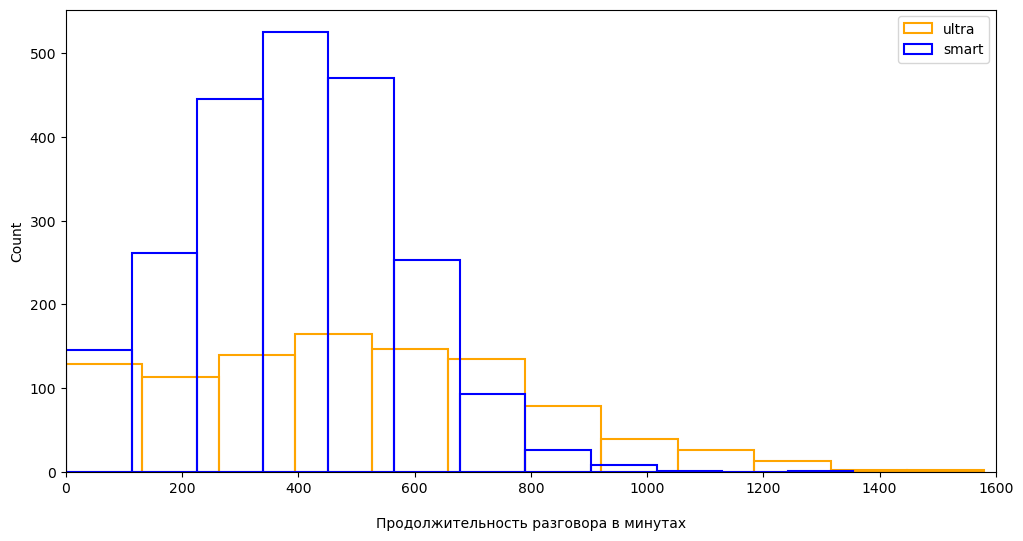

In [104]:
get_histplot('calls_duration')
plt.xlim(0,1600)
plt.xlabel('\nПродолжительность разговора в минутах');

Распределение близко к нормальному. 

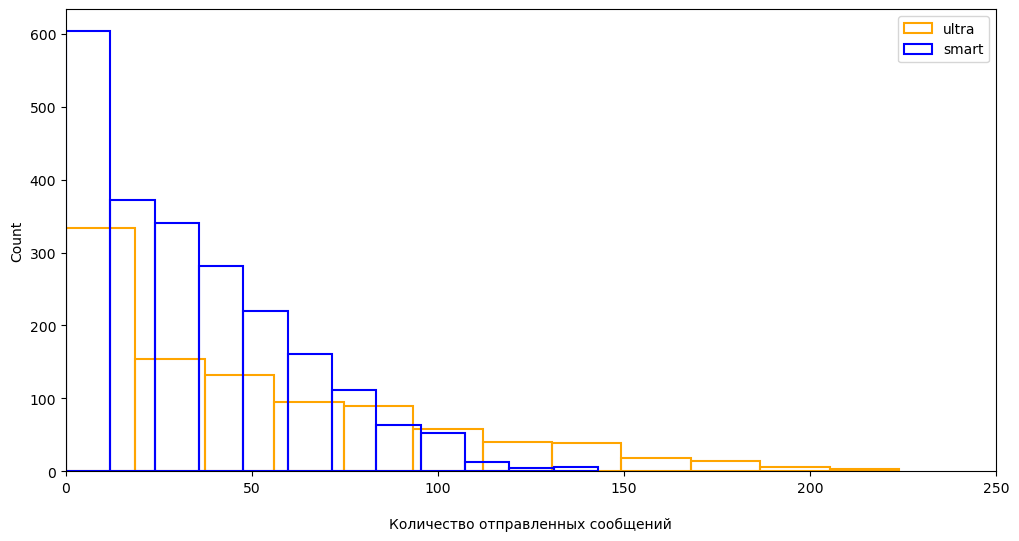

In [105]:
get_histplot('msg_count')
plt.xlim(0,250)
plt.xlabel('\nКоличество отправленных сообщений');

Распределение ассиметрично, сильно скошено вправо. 

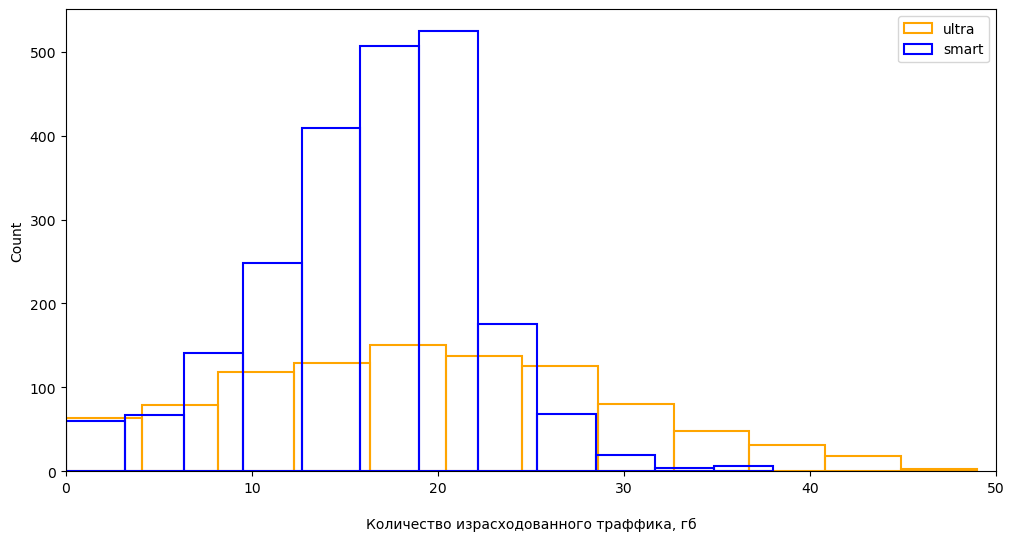

In [106]:
get_histplot('gb_used')   
plt.xlim(0,50)
plt.xlabel('\nКоличество израсходованного траффика, гб');

Распределение близко к нормальному. 

### Ящики с усами

Построим и ящики с усами, чтобы лучше оценить разброс значений

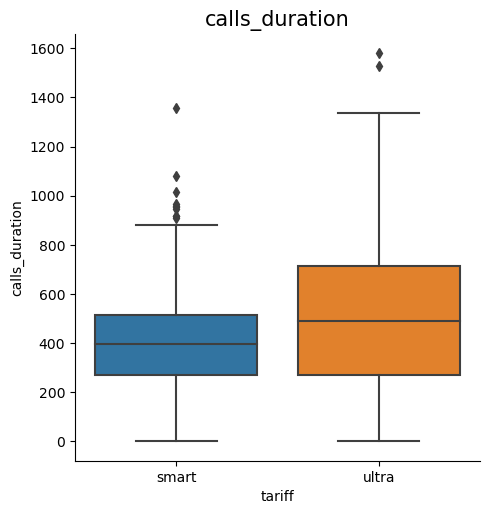

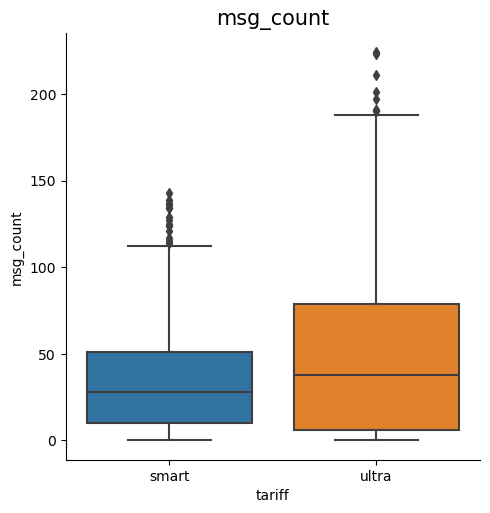

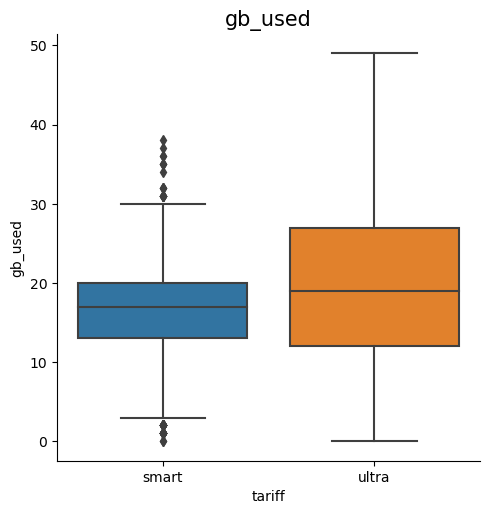

In [107]:
for column in ['calls_duration', 'msg_count', 'gb_used']:
    sns.catplot(x='tariff', y=column, data=df, kind='box')
    plt.title(column, fontsize=15)

У пользователей ultra гораздо больший размах значений. А среди значений тарифа smart гораздо больше выбросов.

Посмотрим, сколько у нас всего пользователей для каждого тарифа

In [108]:
sm = df[df['tariff'] == 'smart']
print('Количество пользователей тарифа smart:', len(sm.user_id.unique()))
ult = df[df['tariff'] == 'ultra']
print('Количество пользователей тарифа ultra:', len(ult.user_id.unique()))

Количество пользователей тарифа smart: 350
Количество пользователей тарифа ultra: 148


У нас разное количество уникальных пользователей для тарифов smart и ultra. 

### Вывод

* Пользователей smart - 350 человек, а пользователей ultra -  148.

* В среднем у пользователей тарифа ultra длительность звонков больше, чем у пользователей тарифа smart. Пользователь ultra в среднем тратит 489 минут в месяц, а пользователь smart - 398.

* В среднем пользователи ultra используют больше интернет-трафика. Пользователь ultra в среднем тратит 19 гб в месяц, а пользователь smart - 17гб.

* В среднем пользователи ultra отправляют больше сообщений, чем пользователи smart. Пользователь ultra в среднем отправляет 38 сообщений в месяц, а пользователь smart - 28.

* Медиана количества сообщений и у ultra, и у smart сильно меньше среднего - данные по смс скошены вправо для обоих тарифов. Очень хорошо это видно и на нашей гистограмме. 

* Дисперсии (var), а значит размахи значений больше у тарифа ultra, а так же средние и медианы смещены для тарифа ultra в большую сторону, чем для тарифа smart. Это хорошо видно на ящиках с усами.
    
* Среди значений тарифа smart заметно больше выбросов в сравнении с тарифом ultra. 

* Распределения продолжительности звонков и использованного трафика для обоих тарифов близки к нормальному распределению и относительно симметричны. 
        
* Тариф smart принес компании Мегалайн в 2018 году прибыль в 2 121 032 млн. руб, а тариф ultra - 2 041 350 млн. руб.  Однако мы не можем говорить о том, что тариф смарт выгоднее для компании, поскольку пользователей тарифа smart в нашей выборке - 350 человек, а пользователей ultra значительно меньше (в 2 раза) - 148 пользователей. 
    
В следующем шаге выясним, различаются ли средние выручки от пользователей тарифов. 

<a name="stage_4"></a>

# Этап 4. Проверка гипотез


[Наверх к оглавлению](#contents)

### Проверка гипотезы о равенстве средних выручек тарифов ultra и smart

В данном исследовании также требуется проверить, что средняя выручка пользователей тарифов ultra и smart различаются.

Сформулируем нулевую гипотезу:

**H₀: Средняя выручка пользователей тарифов ultra и smart равна.**
    
Сформулируем альтерантивную гипотезу - это утверждение, которое становится верным, если отбрасывается нулевая гипотеза:

**H₁: Средняя выручка пользователей тарифов ultra и smart не равны** (то есть различаются, что и просят нас понять  в данном исследовании).
Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.     
    
    

Зададим уровень статистической значимости

In [109]:
alpha=.001 

Делаем две подвыборки - для тарифа смарт и для тарифа ультра

In [110]:
smart = df.query('tariff=="smart"')['revenue']
ultra = df.query('tariff=="ultra"')['revenue']

In [111]:
print("Размер выброки smart:", len(smart))
print("Размер выброки ultra:", len(ultra))

Размер выброки smart: 2229
Размер выброки ultra: 985


Выборки большие, но разного размера.

Посмотрим на дисперсии выборок по тарифам. Поскольку мы имеем дело не с генеральной совокупностью, а с выборками установим параметр ddof=1

In [112]:
print('Дисперсия выборки пользователей тарифа smart:', smart.var(ddof=1))
print('Дисперсия выборки пользователей тарифа ultra:', ultra.var(ddof=1))

Дисперсия выборки пользователей тарифа smart: 316604.3066433723
Дисперсия выборки пользователей тарифа ultra: 141516.745078617


Дисперсии различаются.

Благодаря ЦПТ если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. 

У нас достаточно большие выборки, чтобы не проверять нормальность распределения. К тому же, средние выручки выборок не зависят друг от друга. Поэтому проверим гипотезу, используя встроенную в библиотеку scipy функцию `ttest_ind, которая вычисляет уровень значимости критерия Стьюдента для двух независимых выборок`. 

Поскольку выборки у нас разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, укажим параметр `equal_var` как False, и тест посчитает дисперсии выборок по отдельности.


In [113]:
results = st.ttest_ind(smart, ultra, equal_var=False) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): #если p-value окажется меньше критического уровня значимости - отвегнем нулевую гипотезу 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Тест показал, что средняя выручка тарифов смарт и ультра различаются.

Посмотрим также на средние выручек по тарифам в сводной таблице:

In [114]:
df.groupby('tariff')['revenue'].mean()

tariff
smart     945.191566
ultra    2070.152284
Name: revenue, dtype: float64

Да, средние выручки значительно (в 2 раза) отличаются.

### Проверка гипотезы о равенстве средних выручек для Москвы и других городов

Нам нужно проверить, отличается ли средняя выручка для пользователей из Москвы от выручки пользователей других регионовю

Сформулируем нулевую и альтернативную гипотезы:

**H₀:  средняя выручка от пользователей из г. Москва равна средней выручке пользователей других городов**

**H₁:  средние выручки не равны** (то есть отличаются, что нас и просят проверить)

Зададим уровень критической статистической значимости

In [115]:
alpha=.001

Создадим две выборки: сохраним пользователей из Москвы и из других городов.

In [116]:
moscow = df[df['city'] == 'Москва']
others = df[df['city'] != 'Москва']

In [117]:
print("Размер выброки пользователей г. Москвы:", len(moscow))
print("Размер выброки пользователей других городов:", len(others))

Размер выброки пользователей г. Москвы: 611
Размер выброки пользователей других городов: 2603


Выборки достаточно большие, разного размера.

In [118]:
print('Дисперсия выборки пользователей г. Москвы:', moscow['revenue'].var(ddof=1))
print('Дисперсия выборки пользователей остальных городов:', others['revenue'].var(ddof=1))

Дисперсия выборки пользователей г. Москвы: 512180.68758552097
Дисперсия выборки пользователей остальных городов: 535568.9834726234


Дисперсии несильно отличаются. 

Проведем t-тест, equal_var по умолчанию не трогаем, поскольку дисперсии не сильно отличаются. 

In [119]:
results = st.ttest_ind(moscow['revenue'], others['revenue']) 
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): #если p-value окажется меньше критического уровня значимости - отвегнем нулевую гипотезу 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.014365215901608927
Не получилось отвергнуть нулевую гипотезу


В данном случае нам не удалось отвергнуть нулевую гипотезу. 

Хотя уровень значимости критерия Стьюдента получился невысоким, то есть всего с вероятностью чуть больше 1%, сравнивая средние выручки Москвы и других пользователей, мы бы получали схожие значения.

Проверим средние выручки в наших выборках для наглядности

In [120]:
print('Средняя выручка пользователей Москвы: ', round(moscow['revenue'].mean()))
print('Средняя выручка пользователей других городов: ', round(others['revenue'].mean()))

Средняя выручка пользователей Москвы:  1355
Средняя выручка пользователей других городов:  1275


Как видим, действительно средние выручек не особо отличаются друг от друга по размеру. 

<a name="stage_5"></a>

# Этап 5. Общий вывод

[Наверх к оглавлению](#contents)

На этапе анализа данных мы вычислили основные показатели пользователей двух тарифов: среднее, медиану, дисперсию и стандартное отклонение, и смогли сделать следующие выводы:

* В среднем пользователь smart проговаривает 398 минуты в месяц, а пользователь ultra - 489 минут.

* В среднем пользователь smart использует 16.5 гб. трафика, а пользователь тарифа ultra - 19 гб.

* В среднем пользователь smart отправляет 28 сообщений, а пользователь тарифа ultra - 38.

* Дисперсии тарифа ultra больше, чем у тарифа smart, это значит, размах значений у ultra больше, чем у смарт.

Мы провели статистический анализ и c помощью t-критерия Стьюдента, выбрав уровень значимости  𝛼=0.1%, проверили следующие две нулевые гипотезы:
    
   1. Средние выручки от пользователей smart и ultra равны.
   
   2. Средние выручки от пользователей-жителей Москвы равны средним выручкам из других городов.
    
Альтернативные гипотезы звучали как: средние выручки не равны. 

* В случае с разными тарифами мы отвергли нулевую гипотезу, и сделали вывод о том, что мы можем с вероятностью 99,9% утверждать, что средняя выручка пользователя тарифа smart и тарифа ultra отличаются.

* В случае с пользователями из Москвы и других городов мы не смогли отвергнуть нулевую гипотезу и сделали вывод о том, что, сравнивая средние выручки, мы бы получали схожие значения.

Исследуя выручку по каждому тарифу, мы выяснили следующее:

* Годовая выручка от пользователей тарифа smart составляет 2 121 032 млн. руб, а от пользователей ultra - 2 041 350 млн. руб. 
При этом стоит помнить, что количество поьзователей для каждого тарифа разное: 350 - для smart и 148 - для ultra. 

* В среднем в месяц пользователь тарифа ultra приносит 1950 рублей, а пользователь тарифа smart - 700 рублей, что говорит нам о том, что среднестатистический пользователь тарифа smart выходит за лимиты тарифа и переплачивает.
Возможно, это может приводить таких клиентов к более дорогому тарифу ultra. В целом тариф ultra выглядит более прибыльным тарифом и привлечение здесь клиентов значительно бы увеличило доход компании. 





# Спасибо за внимание!